# Import packages

In [13]:
import pandas as pd
import numpy as np
import keras
import tensorflow
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D, Input
from tensorflow.python.keras import regularizers
from keras.models import Model

# Import Data

In [14]:
df = pd.read_csv('data/total_transactions.csv')
df

,Pcard Transactions Acceptor Name,Pcard Transactions Cc Acceptor Country,Pcard Transactions Credit (Yes / No),Pcard Transactions Declined (Yes / No),Pcard Transactions Processing Type,Pcard Transactions Transaction Risk Score,Pcard Transactions Card Presence,Pcard Transactions Cardholder Presence,Pcard Transactions Fraud (Yes / No)
0,LTD COMMODITIES,US,Yes,No,NaN,NaN,NaN,NaN,No
1,ROYVELLA,US,Yes,No,NaN,NaN,NaN,NaN,No
2,NASSAU CANDY,US,Yes,No,NaN,NaN,NaN,NaN,No
3,CLOUDSPECI EBAY,US,Yes,No,NaN,NaN,NaN,NaN,No
4,BERLIN PACKAGING,US,Yes,No,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...
520070,WAL-MART,US,No,No,MANUAL,8900.0,0.0,0.0,No
520071,WAL-MART,US,No,No,MANUAL,9100.0,0.0,0.0,No
520072,WAL-MART,US,No,No,MANUAL,9400.0,0.0,0.0,No
520073,WAL-MART,US,No,No,MANUAL,9600.0,0.0,0.0,No


# Fill in NA's
1. Fill Na's with 0 in Card Presence and Cardholder Presence
2. Fill Na's with average in Transaction Risk Score
3. Fill Na's with 'UNKNOWN' in Processing Type

In [15]:
df[['Pcard Transactions Card Presence','Pcard Transactions Cardholder Presence']] = df[['Pcard Transactions Card Presence','Pcard Transactions Cardholder Presence']].fillna(0)
df['Pcard Transactions Transaction Risk Score'] = df['Pcard Transactions Transaction Risk Score'].fillna(df['Pcard Transactions Transaction Risk Score'].mean())
df['Pcard Transactions Processing Type'] = df['Pcard Transactions Processing Type'].fillna('UNKNOWN')

In [16]:
df

,Pcard Transactions Acceptor Name,Pcard Transactions Cc Acceptor Country,Pcard Transactions Credit (Yes / No),Pcard Transactions Declined (Yes / No),Pcard Transactions Processing Type,Pcard Transactions Transaction Risk Score,Pcard Transactions Card Presence,Pcard Transactions Cardholder Presence,Pcard Transactions Fraud (Yes / No)
0,LTD COMMODITIES,US,Yes,No,UNKNOWN,15.307484,0.0,0.0,No
1,ROYVELLA,US,Yes,No,UNKNOWN,15.307484,0.0,0.0,No
2,NASSAU CANDY,US,Yes,No,UNKNOWN,15.307484,0.0,0.0,No
3,CLOUDSPECI EBAY,US,Yes,No,UNKNOWN,15.307484,0.0,0.0,No
4,BERLIN PACKAGING,US,Yes,No,UNKNOWN,15.307484,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...
520070,WAL-MART,US,No,No,MANUAL,8900.000000,0.0,0.0,No
520071,WAL-MART,US,No,No,MANUAL,9100.000000,0.0,0.0,No
520072,WAL-MART,US,No,No,MANUAL,9400.000000,0.0,0.0,No
520073,WAL-MART,US,No,No,MANUAL,9600.000000,0.0,0.0,No


# Encode categorical variables

In [17]:
df[['Pcard Transactions Cc Acceptor Country','Pcard Transactions Credit (Yes / No)',
    'Pcard Transactions Declined (Yes / No)','Pcard Transactions Processing Type',
   'Pcard Transactions Fraud (Yes / No)']] = df[['Pcard Transactions Cc Acceptor Country','Pcard Transactions Credit (Yes / No)',
    'Pcard Transactions Declined (Yes / No)','Pcard Transactions Processing Type',
   'Pcard Transactions Fraud (Yes / No)']].astype('category')
df['Acceptor Country'] = df['Pcard Transactions Cc Acceptor Country'].cat.codes
df['Credit'] = df['Pcard Transactions Credit (Yes / No)'].cat.codes
df['Declined'] = df['Pcard Transactions Declined (Yes / No)'].cat.codes
df['Type'] = df['Pcard Transactions Processing Type'].cat.codes
df['Fraud'] = df['Pcard Transactions Fraud (Yes / No)'].cat.codes
df

,Pcard Transactions Acceptor Name,Pcard Transactions Cc Acceptor Country,Pcard Transactions Credit (Yes / No),Pcard Transactions Declined (Yes / No),Pcard Transactions Processing Type,Pcard Transactions Transaction Risk Score,Pcard Transactions Card Presence,Pcard Transactions Cardholder Presence,Pcard Transactions Fraud (Yes / No),Acceptor Country,Credit,Declined,Type,Fraud
0,LTD COMMODITIES,US,Yes,No,UNKNOWN,15.307484,0.0,0.0,No,72,1,0,6,0
1,ROYVELLA,US,Yes,No,UNKNOWN,15.307484,0.0,0.0,No,72,1,0,6,0
2,NASSAU CANDY,US,Yes,No,UNKNOWN,15.307484,0.0,0.0,No,72,1,0,6,0
3,CLOUDSPECI EBAY,US,Yes,No,UNKNOWN,15.307484,0.0,0.0,No,72,1,0,6,0
4,BERLIN PACKAGING,US,Yes,No,UNKNOWN,15.307484,0.0,0.0,No,72,1,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520070,WAL-MART,US,No,No,MANUAL,8900.000000,0.0,0.0,No,72,0,0,5,0
520071,WAL-MART,US,No,No,MANUAL,9100.000000,0.0,0.0,No,72,0,0,5,0
520072,WAL-MART,US,No,No,MANUAL,9400.000000,0.0,0.0,No,72,0,0,5,0
520073,WAL-MART,US,No,No,MANUAL,9600.000000,0.0,0.0,No,72,0,0,5,0


# Preprocessing

In [18]:
X = df[['Acceptor Country','Credit','Declined','Type','Pcard Transactions Transaction Risk Score',
       'Pcard Transactions Card Presence','Pcard Transactions Cardholder Presence']]
Y = df['Fraud']
T = df[['Acceptor Country','Credit','Declined','Type','Pcard Transactions Transaction Risk Score',
       'Pcard Transactions Card Presence','Pcard Transactions Cardholder Presence','Fraud']]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

scalar = StandardScaler()
x_train_scale = scalar.fit_transform(X_train)
x_test_scale = scalar.transform(X_test)

x_norm_test, x_fraud_test = x_test_scale[y_test == 0], x_test_scale[y_test == 1]

In [19]:
X_train

,Acceptor Country,Credit,Declined,Type,Pcard Transactions Transaction Risk Score,Pcard Transactions Card Presence,Pcard Transactions Cardholder Presence
277537,72,0,0,5,11.0,0.0,0.0
274188,72,0,0,5,11.0,0.0,0.0
497708,72,0,0,1,32.0,0.0,0.0
387961,72,0,0,1,20.0,1.0,1.0
386257,72,0,0,1,20.0,1.0,1.0
...,...,...,...,...,...,...,...
259178,72,0,0,5,10.0,0.0,0.0
365838,72,0,0,1,18.0,1.0,1.0
131932,72,0,0,5,3.0,0.0,0.0
146867,72,0,0,5,4.0,0.0,0.0


In [20]:
T.corr()['Fraud']

Acceptor Country                            -0.032670
Credit                                      -0.002976
Declined                                          NaN
Type                                         0.006429
Pcard Transactions Transaction Risk Score    0.008373
Pcard Transactions Card Presence             0.012593
Pcard Transactions Cardholder Presence       0.007197
Fraud                                        1.000000
Name: Fraud, dtype: float64

In [21]:
sorted(T.corr()['Fraud'])

[-0.03267008861563184,
 -0.002976180552712265,
 nan,
 0.00642928162040966,
 0.007196753868515041,
 0.00837343326757481,
 0.012593151039460558,
 1.0]

<AxesSubplot:>

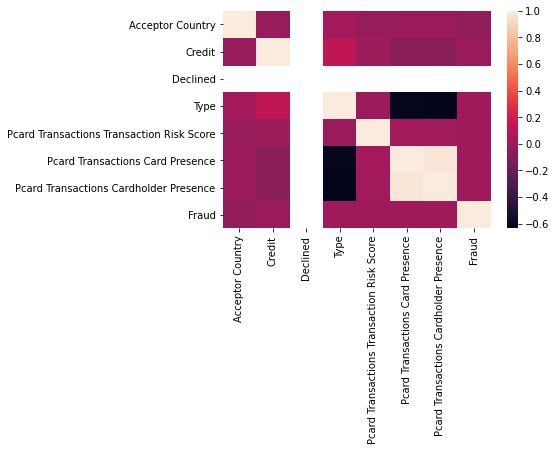

In [22]:
sns.heatmap(T.corr())

In [ ]:
def tsne_plot(x1, y1):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)
    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], color='b', linewidth=0.5, alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], color='r', linewidth=0.5, alpha=0.8, label='Fraud')
    plt.legend(loc='best');
    plt.show();
    
tsne_plot(X,Y)

# Modeling

## Logistic Regression

In [23]:
reg = LogisticRegression()
reg.fit(x_train_scale,y_train)
reg_pred = reg.predict(x_test_scale)
print(classification_report(y_test,reg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103962
           1       0.00      0.00      0.00        53

    accuracy                           1.00    104015
   macro avg       0.50      0.50      0.50    104015
weighted avg       1.00      1.00      1.00    104015



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tsne_plot(X_test,reg_pred)

## RandomForest

In [24]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(x_train_scale,y_train)
pred = clf.predict(x_test_scale)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103962
           1       0.00      0.00      0.00        53

    accuracy                           1.00    104015
   macro avg       0.50      0.50      0.50    104015
weighted avg       1.00      1.00      1.00    104015



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tsne_plot(X_test,pred)

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_scale, y_train)
knn_pred = knn.predict(x_test_scale)
print(classification_report(y_test,knn_pred))

In [ ]:
tsne_plot(X_test,knn_pred)

# ANN

In [ ]:
metrics = [
    'accuracy',
    keras.metrics.Precision(),
    keras.metrics.Recall()
]

def NN(Xt):
    model = keras.Sequential()
    model.add(Dense(64, activation='relu', input_shape=(Xt.shape[-1],)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer = 'adam', 
                  loss = 'binary_crossentropy', metrics = metrics)
    
    return model

In [ ]:
model = NN(Xt = x_train_scale)
history = model.fit(x_train_scale, y_train, validation_data = (x_test_scale, y_test), epochs = 100, verbose = 0)
norm_hid_rep = model.predict(x_norm_test)
fraud_hid_rep = model.predict(x_fraud_test)
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
score = model.evaluate(X_test, y_test)
tsne_plot(rep_x, rep_y)

# Featrue Importance

In [ ]:
predictors = ['Country','Credit','Declined','Type','Risk Score',
       'Card Presence','Cardholder Presence']
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()